# Initial Data Analysis
## Prerequisits

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import db_access as db
from sqlalchemy import create_engine

plt.style.use('seaborn-whitegrid')

conn = create_engine('postgresql+psycopg2://{}:{}@{}:{}/{}'.format(
    db.user, db.password, db.host, db.port, db.database
)).connect()

pv = pd.read_sql('SELECT * FROM pv', conn, 'datetime')
pv.dtypes

energy_positiv_ws           int64
reactive_energy_l_vars      int64
reactive_energy_c_vars      int64
uac_l1_v                  float64
iac_l1_a                  float64
udc_mppt1_v               float64
idc_mppt1_a               float64
udc_mppt2_v               float64
idc_mppt2_a               float64
dtype: object

## Time Series
- no observations at night
- daily seasonality
- different number of observations every day
- observations every day at different times
- strong correlation between energy, reactive energy and current
- inductive load is much greater than capacitive load
- output voltage at about 230
 - some values at zero but only at start or end of day
 - input voltage lower and more variable
- current at output only a little greater than at input

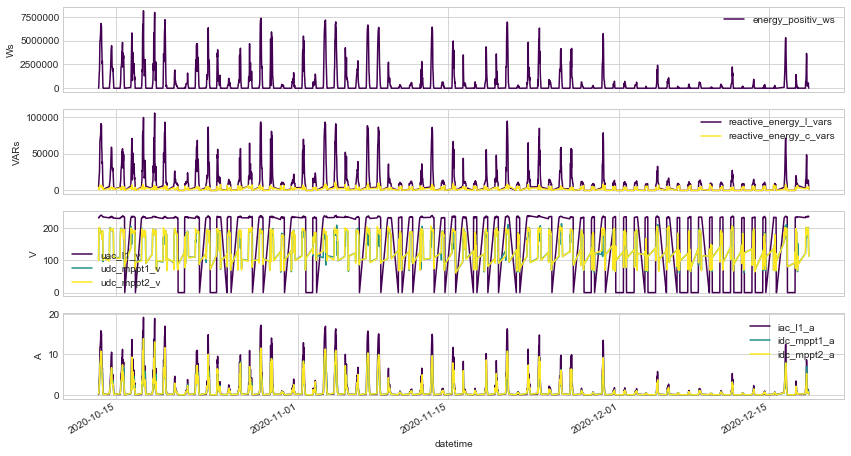

,energy_positiv_ws,reactive_energy_l_vars,reactive_energy_c_vars,uac_l1_v,iac_l1_a,udc_mppt1_v,idc_mppt1_a,udc_mppt2_v,idc_mppt2_a
datetime,,,,,,,,,
2020-10-13 08:20:15,2124,5150,2733,231.0,0.06,100.4,0.22,98.6,0.23
2020-10-13 08:50:15,273594,10756,4067,232.5,0.66,191.8,0.48,184.5,0.54
2020-10-13 09:20:15,1121404,17769,907,234.1,2.66,190.4,1.56,201.3,1.93
2020-10-13 09:50:15,1620983,21568,995,235.0,3.83,199.7,2.04,202.1,2.75
2020-10-13 10:20:15,1786187,24120,988,234.7,4.22,200.0,2.39,200.7,2.88
...,...,...,...,...,...,...,...,...,...
2020-12-18 14:30:00,431581,13003,3385,235.9,1.02,188.9,0.76,187.6,0.75
2020-12-18 15:00:00,463006,10896,3549,236.9,1.08,190.7,0.82,188.5,0.73
2020-12-18 15:30:00,563260,14026,3016,236.6,1.32,201.5,1.12,200.0,0.64


In [2]:
ws = pv.energy_positiv_ws
var = pv[['reactive_energy_l_vars', 'reactive_energy_c_vars']]
v = pv[['uac_l1_v', 'udc_mppt1_v', 'udc_mppt2_v']]
a = pv[['iac_l1_a', 'idc_mppt1_a', 'idc_mppt2_a']]
l = [ws, var, v, a]
ylabel = ['Ws', 'VARs', 'V', 'A']

fig, ax = plt.subplots(4, sharex='all', figsize=(14, 8))
for i in [0, 1, 2, 3]:
    l[i].plot(ax=ax[i], grid=True, legend=True, ylabel=ylabel[i],
              colormap='viridis')
plt.show()
pv

## Boxplots

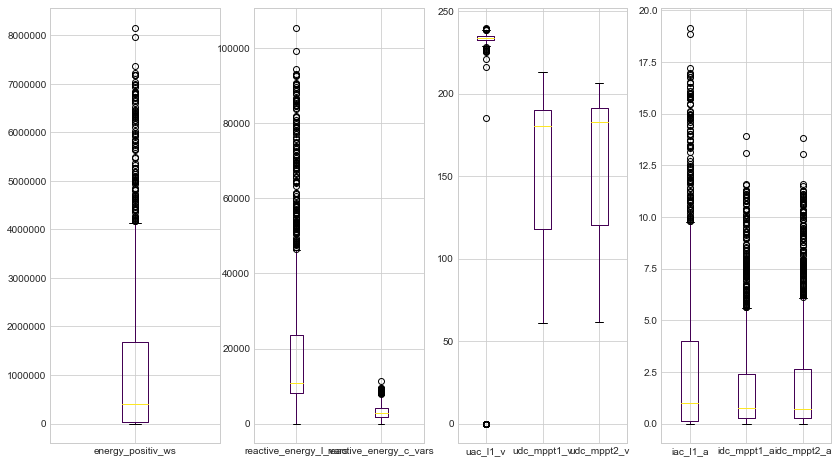

,energy_positiv_ws,reactive_energy_l_vars,reactive_energy_c_vars,uac_l1_v,iac_l1_a,udc_mppt1_v,idc_mppt1_a,udc_mppt2_v,idc_mppt2_a
count,1.205000e+03,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,1.212920e+06,19525.678838,3102.266390,219.718091,2.875253,156.083983,1.947768,158.164315,2.000423
std,1.739445e+06,20898.856762,1859.573549,55.462679,4.072522,43.246186,2.655767,43.659544,2.729500
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,60.800000,0.000000,61.300000,0.000000
25%,3.791500e+04,8220.000000,1820.000000,232.300000,0.140000,118.000000,0.290000,120.300000,0.290000
50%,4.074690e+05,10807.000000,2832.000000,233.600000,0.970000,180.300000,0.730000,182.600000,0.710000
75%,1.680593e+06,23523.000000,4251.000000,234.900000,3.990000,190.200000,2.420000,191.500000,2.620000
max,8.146009e+06,105401.000000,11302.000000,239.700000,19.140000,213.400000,13.920000,206.600000,13.830000


In [3]:
fig, ax = plt.subplots(ncols=4, figsize=(14, 8))
for i in [0, 1, 2, 3]:
    l[i].plot(kind='box', ax=ax[i], grid=True, legend=True, colormap='viridis')
plt.show()
pv.describe()

## Kernel Densitys
- distributions close to normality
- most are a little skewed to the right
- voltage is a little skewed to the left

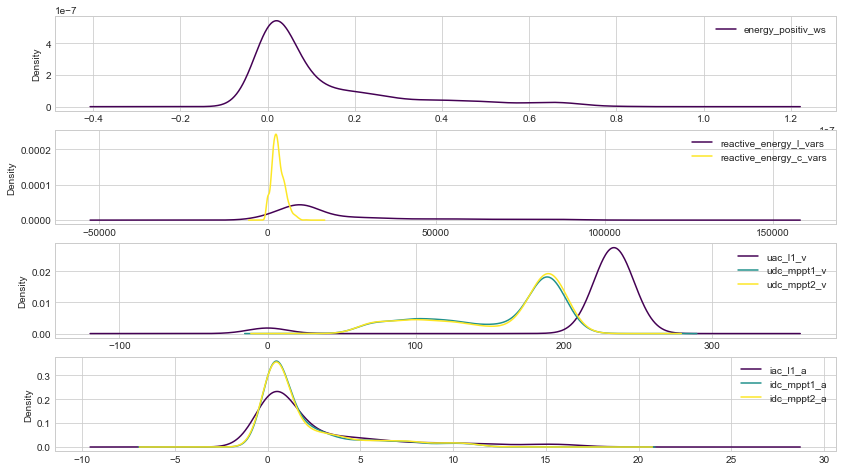

In [4]:
fig, ax = plt.subplots(nrows=4, figsize=(14, 8))
for i in [0, 1, 2, 3]:
    l[i].plot(kind='density', ax=ax[i], grid=True, legend=True, colormap='viridis')
plt.show()
